# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в программирование" </center>

# <center> Первичный анализ данных. Pandas. </center>

## Credits
[Открытый курс ODS по машинному обучению](https://github.com/Yorko/mlcourse_open) 

## Часть 1.   
  
1. Установите Anaconda (или Miniconda) и запустите Jupyter Notebook
2. Воспроизведите вычисления с семинара (файл `Explore_analysis.Pandas.ipynb`) <br>
   **Note:** Возможно, придется самостоятельно установить библиотеку seaborn. Для этого в Anaconda Prompt выполните `conda install seaborn`
3. Разберите тьюториалы [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min) и [Essential basic functionality](https://pandas.pydata.org/docs/user_guide/basics.html#basics).

## Часть 2. Анализ данных по доходу населения UCI Adult

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult).**

В качестве наблюдений в этом наборе данных представлены физические лица, они характеризуются различными признаками. Целевая переменная **salary** - доход человека > 50K или <= 50K.

In [1]:
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn.neighbors import KNeighborsClassifier

# чтоб картинки рисовались в тетрадке
%matplotlib inline 

In [2]:
data = pd.read_csv('adult_data.csv')
data.head()

# skip initial space = True

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
# Ideal data
# header = ['age', 'workclass', 'fnlwgt'. 'education', 'education', 'num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
ideal_data = pd.read_csv('adult_data.csv', skipinitialspace=True, na_values='?')
ideal_data = ideal_data.dropna()
ideal_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Определите размерность данных: сколько наблюдений и сколько признаков**

In [97]:
print(f'Records: {data.shape[0]}')
print(f'Characteristics: {data.shape[1]}')

Records: 32561
Characteristics: 15


**Список признаков**  
**На источнике описание признаков скудное, но названия почти у всех признаков говорящие**

In [98]:
print('\n'.join(data.columns.values.tolist()))

age
 workclass
 fnlwgt
 education
 education-num
 marital-status
 occupation
 relationship
 race
 sex
 capital-gain
 capital-loss
 hours-per-week
 native-country
 salary


**Проверьте, присутствуют ли в данных [пропущенные значения](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). Сколько? В каких признаках?**  
**Удалите наблюдения с пропущенными значениями**

In [15]:
data = data.replace(to_replace=' ?', value=np.nan)
print(data.isna().sum())
print(data.shape)
data = data.dropna()
print(data.shape)

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 salary               0
dtype: int64
(32561, 15)
(30162, 15)


**Для каждого признака определите, к какому типу он относится. При необходимости, приведите признак к определенному вами типу.**

In [16]:
data.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 salary            object
dtype: object

**Для категориальных признаков выведите список категорий**

In [17]:
for column in data:
    print(data[column].unique() if data[column].dtypes != 'int64' else '')


[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']



[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' 

### Используя функции и методы Pandas, ответьте на вопросы:

**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [18]:
print('Men: ', len(data[data[' sex'] == ' Male']))
print('Women: ', len(data[data[' sex'] == ' Female']))

Men:  20380
Women:  9782


**2. Каков средний возраст (признак *age*) женщин?**

In [19]:
data[data[' sex'] == ' Female']['age'].mean()

36.8834594152525

**3. Какова доля граждан Германии (признак *native-country*)?**

In [20]:
len(data[data[' native-country'] == ' Germany']) / len(data)

0.004243750414428751

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

<AxesSubplot:xlabel=' education'>

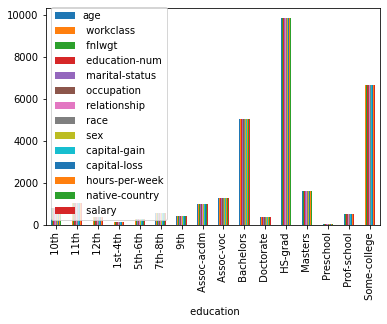

In [21]:
data.groupby(' education').count().plot.bar()

__5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак _salary_) и тех, кто получает менее 50K в год?__  
  
**Tip:** Используйте методы `groupby` и `agg`.

In [22]:
data.groupby([' salary'])['age'].agg(['mean', 'std'])

,mean,std
salary,,
<=50K,36.60806,13.464631
>50K,43.95911,10.269633


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**  
  
**Tip:** Нужно написать код (может хватить и одного выражения), который проверяет выполнение условия и возвращает `True` если условие выполняется (т.е. ответ на вопрос - да, правда) и `False` иначе.

In [23]:
highest_education = [' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate']
data[data[' salary'] == ' >50K'][' education'].apply(lambda education: education in highest_education)

7        False
8         True
9         True
10       False
11        True
         ...  
32538     True
32545     True
32554     True
32557    False
32560    False
Name:  education, Length: 7508, dtype: bool

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**  
  
**Tip:** Максимальный возраст мужчин расы *Amer-Indian-Eskimo* необходимо получить из таблицы, полученной в результате использования методов *groupby* и *describe*. Почитайте про [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/advanced.html).

In [24]:
data.groupby([' race'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,286.0,36.737762,11.630168,17.0,28.0,35.0,44.75,80.0
Asian-Pac-Islander,895.0,37.910615,12.587717,17.0,28.0,36.0,46.00,90.0
Black,2817.0,37.860845,12.418791,17.0,28.0,37.0,46.00,90.0
Other,231.0,33.601732,10.949163,17.0,26.0,31.0,41.00,77.0
White,25933.0,38.580612,13.250943,17.0,28.0,37.0,47.00,90.0


In [25]:
data.groupby([' race'])['age'].max()

 race
 Amer-Indian-Eskimo    80
 Asian-Pac-Islander    90
 Black                 90
 Other                 77
 White                 90
Name: age, dtype: int64

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [28]:
status_married = [' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse']
married_men = data[(data[' sex'] == ' Male') & (data[' marital-status'].apply(lambda status: status in status_married))]
not_married_men = data[(data[' sex'] == ' Male') & (data[' marital-status'].apply(lambda status: status not in status_married))]

rich_married_men = married_men[married_men[' salary'] == ' >50K']
rich_not_married_men = not_married_men[not_married_men[' salary'] == ' >50K']

print(len(rich_married_men) / len(married_men))
print(len(rich_not_married_men) / len(not_married_men))

0.4479843444227006
0.08849441157133466


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [29]:
data[' hours-per-week'].max()

99

In [30]:
len(data[data[' hours-per-week'] == data[' hours-per-week'].max()])

78

In [31]:
len(data[(data[' hours-per-week'] == data[' hours-per-week'].max()) & (data[' salary'] == ' >50K')]) / len(data[data[' hours-per-week'] == data[' hours-per-week'].max()])

0.32051282051282054

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**  
  
**Tip:** Необходимо построить `barplot` для каждой страны с разбивкой по признаку *salary*. Используйте [crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html).  
Пример графика: ![](task_10_example.png)

In [32]:
pd.crosstab(data[' native-country'], data[' salary'], values=data[' hours-per-week'], aggfunc='mean')

salary,<=50K,>50K
native-country,,
Cambodia,41.545455,40.000000
Canada,38.704225,46.944444
China,38.541667,38.900000
Columbia,39.259259,50.000000
Cuba,38.716418,42.440000
Dominican-Republic,42.138462,47.000000
Ecuador,38.739130,48.750000
El-Salvador,36.208791,45.000000
England,41.375000,44.533333


<AxesSubplot:xlabel=' native-country'>

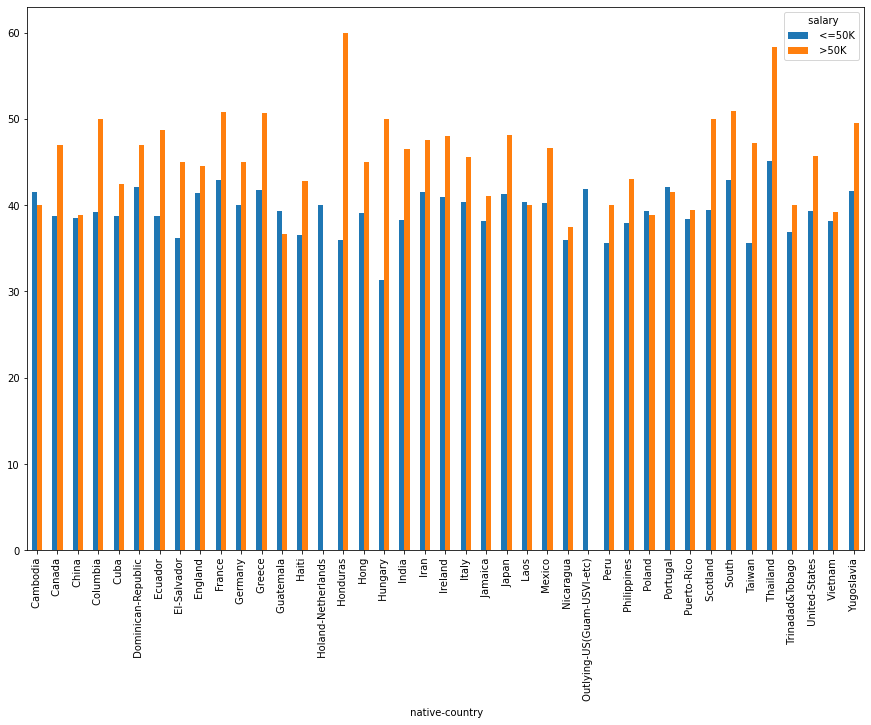

In [37]:
pd.crosstab(data[' native-country'], data[' salary'], values=data[' hours-per-week'], aggfunc='mean').plot.bar(figsize=(15, 10))